<p><img alt="Colaboratory logo" width="270" height="110" src="https://media.discordapp.net/attachments/1221133702638338190/1231107633889542225/Untitled8_20240420000201.PNG?ex=6635c154&is=66234c54&hm=180cc4497fc7fd9dfadba50c9f008ff4ed057deb6bbd946712c1d68cd54e612c&=&format=webp&quality=lossless&width=1025&height=342" align="left" hspace="15px" ></p>


<h1>SinergIA UdeA</h1>

----
<b>Cuidado Vital</b> <br> reto #4

<div align="left">
<font size=3>
 <br><br>
  
</font>
</div>



El desafío propuesto implica la creación de una herramienta que combine la inteligencia artificial (IA) y el análisis de datos para optimizar la atención inmediata de pacientes que experimentan descompensaciones en áreas de hospitalización o entornos fuera de urgencias, unidades de cuidados intensivos (UCI) y salas de operaciones.

La aplicación propuesta agiliza la recopilación de datos en momentos críticos, lo que conduce a una documentación más eficiente y precisa. Además, ofrece recomendaciones respaldadas por análisis de inteligencia artificial (IA), lo que facilita la toma de decisiones del personal médico y, en consecuencia, mejora la calidad de atención y la eficiencia en la gestión de situaciones de emergencia.

In [174]:
# Modulos necesarios 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Preprocesamiento de datos

In [157]:
# Leer datos 
original_data = pd.read_csv('..\data\pacientes.csv')
df = original_data.copy().iloc[:, 1:]
df.fillna(0, inplace=True) # Reempalzar Nan con 0 
df.head(5)

,edad,sexo,altura,peso,imc,antecedentes,historia_familiar,sintomas,riesgos_med,FR,SpO2,PaCO2,pH,FC,PAS,PAM,GFR,UCI
0,48,F,1.626315,70.070819,26.492793,0,0,['Respiratorio'],0,13.0,87.0,39.0,7.266667,0.0,0.0,0.0,0.0,True
1,29,M,1.541203,92.419598,38.908472,"['Cardiovascular', 'Respiratorio']",['Renal'],"['Respiratorio', 'Cardiovascular', 'Renal']",0,1.0,91.0,56.0,7.088889,98.0,135.0,67.0,62.0,True
2,52,F,1.706750,57.508615,19.742082,['Cardiovascular'],"['Respiratorio', 'Cardiovascular', 'Renal']","['Respiratorio', 'Renal']",0,22.0,98.0,47.0,7.444444,0.0,0.0,0.0,75.0,False
3,45,M,1.757704,64.016732,20.720585,0,"['Renal', 'Cardiovascular', 'Respiratorio']","['Respiratorio', 'Cardiovascular', 'Renal']",0,24.0,96.0,47.0,7.088889,74.0,121.0,95.0,60.0,True
4,37,M,1.652675,62.213768,22.777783,0,"['Cardiovascular', 'Renal', 'Respiratorio']",['Respiratorio'],0,14.0,96.0,50.0,7.711111,0.0,0.0,0.0,0.0,False


In [158]:
# -- Preprocesamiento de datos --

def transform_antecedentes(col_name):
    """Transformar variables categoricas en vectores"""

    antecedentes = ['Respiratorio', 'Cardiovascular', 'Renal']

    # Crear nuevas columnas One hot encoder improvisado
    for antecedente in antecedentes:
        df[col_name +'_' + antecedente.lower()]  = 0 

    for i in range(df.shape[0]):
        # Ver las sintomatologías y antecedentes de cada paciente
        paciente_info = df.loc[i, col_name] 

        if paciente_info == 0:
            continue

        else:  
            for antecedente in antecedentes:
                if antecedente in paciente_info:
                    df.loc[i, col_name +'_' + antecedente.lower()]  = 1 # Cambiar el registro por un 1

categoricas = [ 'antecedentes', 'historia_familiar', 'sintomas', 'riesgos_med'] # Columnas con este registro categorico

for column in categoricas:
    transform_antecedentes(column)

df.drop(columns=categoricas, inplace=True)


In [159]:
# Escalamiento de datos

df['UCI'] = df['UCI'].replace({True: 1, False: 0})
df['sexo'] = df['sexo'].replace({'F': 1, 'M': 0})

# Escalar variables que siguen una distribución normal
columns = ['peso', 'edad', 'altura']
scaler = StandardScaler()

for column in columns:
    scaled_data = scaler.fit_transform(df[[column]])
    df[column] = scaled_data
    
# Escalar variables que no siguen la distribución normal
columns = ['imc', 'FR', 'SpO2', 'PaCO2', 'pH', 'FC', 'PAS', 'PAM', 'GFR']
scaler = MinMaxScaler()

for column in columns:
    scaled_data = scaler.fit_transform(df[[column]])
    df[column] = scaled_data

In [167]:
x = df.drop(columns='UCI')
y = df[['UCI']]

# Convertir a tensores
X = tf.constant(x, dtype=tf.float32)
Y = tf.constant(y, dtype=tf.float32)


# Creación del modelo

Probemos un modelo usando redes neuronales

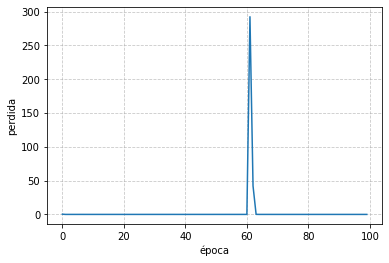

In [173]:
# -- Arquitectura del modelo --
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[25])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)

# -- Crear el modelo --
model = tf.keras.Sequential([oculta1, oculta2, salida])

# -- Compilar el modelo --
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.2),
    loss = "mean_squared_error"
)

hist = model.fit(X_train, Y_train, epochs = 100, verbose=False)

# Graficar perdida por época

plt.xlabel("época")
plt.ylabel('perdida')

plt.plot(hist.history['loss'])
plt.grid(alpha=0.7, linestyle = '--')
plt.show()

